In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

In [4]:
digits=load_digits()

In [6]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [132]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

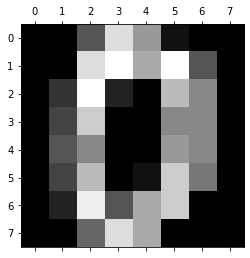

In [8]:
plt.gray()
plt.matshow(digits.images[0])

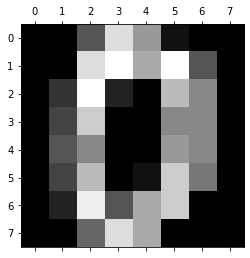

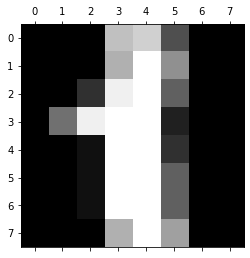

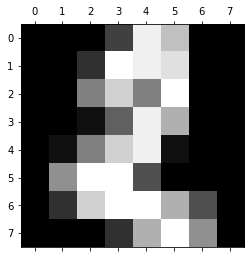

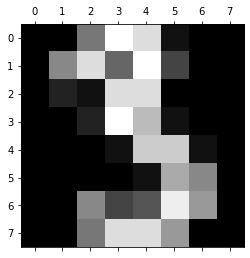

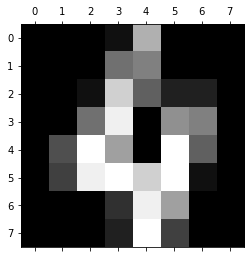

In [12]:
for i in range(5):
    plt.matshow(digits.images[i])

In [34]:
print(digits.target[1797:1700:-1])

[8 9 8 0 9 4 8 8 4 5 9 7 5 2 2 8 2 7 4 4 5 7 1 6 9 6 3 5 0 4 1 3 4 8 6 7 1
 9 3 1 3 6 4 7 1 2 3 6 7 1 0 0 2 8 2 5 9 0 5 1 9 4 6 6 6 4 3 3 7 3 3 6 2 1
 0 2 8 7 2 2 0 0 1 5 3 7 7 1 4 8 9 8 9 0 5 6]


In [113]:
Xtrain,Xtest,ytrain,ytest=train_test_split(digits.data,digits.target, test_size=0.2, random_state=10)

In [204]:
cls=LogisticRegression()
y=ytrain[0:4]
X=Xtrain[0:4]

In [205]:
cls.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
cls.intercept_

array([-2.92963703,  0.47375644,  1.80870352,  0.64717707])

In [207]:
cls.coef_

array([[ 0.        ,  0.        , -0.00219492,  0.00255612, -0.01929795,
        -0.0296918 ,  0.        ,  0.        ,  0.        , -0.02759937,
        -0.01532176,  0.03165135,  0.03642916, -0.03729906, -0.00202417,
         0.        ,  0.        , -0.02838397, -0.0052536 ,  0.05072363,
         0.02996522, -0.01294023, -0.00067472,  0.        ,  0.        ,
        -0.01501557,  0.01174678,  0.04758557,  0.03769191,  0.00678467,
        -0.00269889,  0.        ,  0.        , -0.02105613,  0.00618558,
         0.04717662,  0.0447916 , -0.00233308, -0.00269889,  0.        ,
         0.        , -0.00985334,  0.0473379 ,  0.0178915 ,  0.06237421,
        -0.01533782, -0.01499238,  0.        ,  0.        , -0.00806473,
         0.02161965,  0.00470352,  0.04269316, -0.04311761, -0.02307289,
         0.        ,  0.        ,  0.        ,  0.00885657, -0.01015953,
         0.03446715,  0.01648794, -0.00134945,  0.        ],
       [ 0.        ,  0.        ,  0.00553392,  0.02024783,  0.

In [208]:
cls.intercept_

array([-2.92963703,  0.47375644,  1.80870352,  0.64717707])

In [209]:
cls.intercept_.ndim

1

In [210]:
y_predicted=cls.predict([Xtest[0]])
y_predicted

array([8])

In [211]:
Xtest

array([[ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  1., 13., ..., 16., 16.,  0.],
       [ 0.,  1., 13., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 15.,  5.,  0.],
       [ 0.,  0.,  0., ..., 12.,  1.,  0.],
       [ 0.,  1., 12., ...,  6.,  0.,  0.]])

In [212]:
y_predicted=cls.predict(Xtest)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_predicted)
cm

array([[ 0,  1,  0,  0,  0,  0,  0,  0,  3, 33],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  1,  2],
       [ 0,  7, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0, 12],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  1,  5],
       [ 0,  6,  4,  0,  0,  0,  0,  0, 10, 12],
       [ 0, 17,  0,  0,  0,  0,  0,  0,  0, 20],
       [ 0, 12, 12,  0,  0,  0,  0,  0,  8,  8],
       [ 0, 20,  2,  0,  0,  0,  0,  0,  2,  9],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  2, 33]], dtype=int64)

Text(0.5, 69.0, 'predicted')

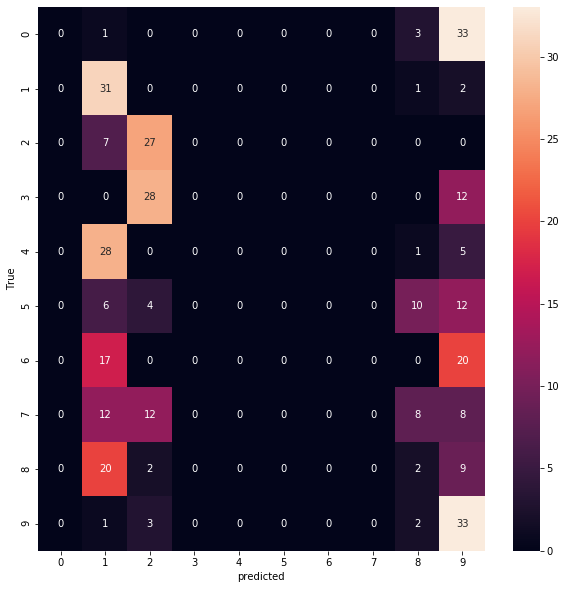

In [213]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.ylabel("True")
plt.xlabel("predicted")

In [214]:
cls.score(Xtest,ytest)

0.25833333333333336